In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import RobustScaler,StandardScaler
rb = RobustScaler()
sc = StandardScaler()

In [4]:
train = pd.read_csv('data/competitive-data-science-predict-future-sales/sales_train.csv')
test = pd.read_csv('data/competitive-data-science-predict-future-sales/test.csv')

In [6]:
shops = pd.read_csv('data/competitive-data-science-predict-future-sales/shops.csv')
items = pd.read_csv('data/competitive-data-science-predict-future-sales/items.csv')
categories = pd.read_csv('data/competitive-data-science-predict-future-sales/item_categories.csv')


In [5]:
dataset = train.pivot_table(index = ['shop_id','item_id'],values = ['item_cnt_day'],columns = ['date_block_num'],fill_value = 0,aggfunc='sum')

In [7]:
train_monthly = train.groupby(['date_block_num', 'shop_id', 'item_id']).agg({'item_cnt_day': 'sum'}).reset_index()
train_monthly.rename(columns = {'item_cnt_day':'item_cnt_month'},inplace=True)
print(train_monthly.head(3))

   date_block_num  shop_id  item_id  item_cnt_month
0               0        0       32             6.0
1               0        0       33             3.0
2               0        0       35             1.0


In [9]:
train_monthly_shop = train_monthly.groupby(['date_block_num','shop_id']).agg({'item_cnt_month':'sum'}).reset_index()
train_monthly_shop.rename(columns={'item_cnt_month':'shop_cnt_month'},inplace=True)
print(train_monthly_shop.head(3))

   date_block_num  shop_id  shop_cnt_month
0               0        0          5578.0
1               0        1          2947.0
2               0        2          1146.0


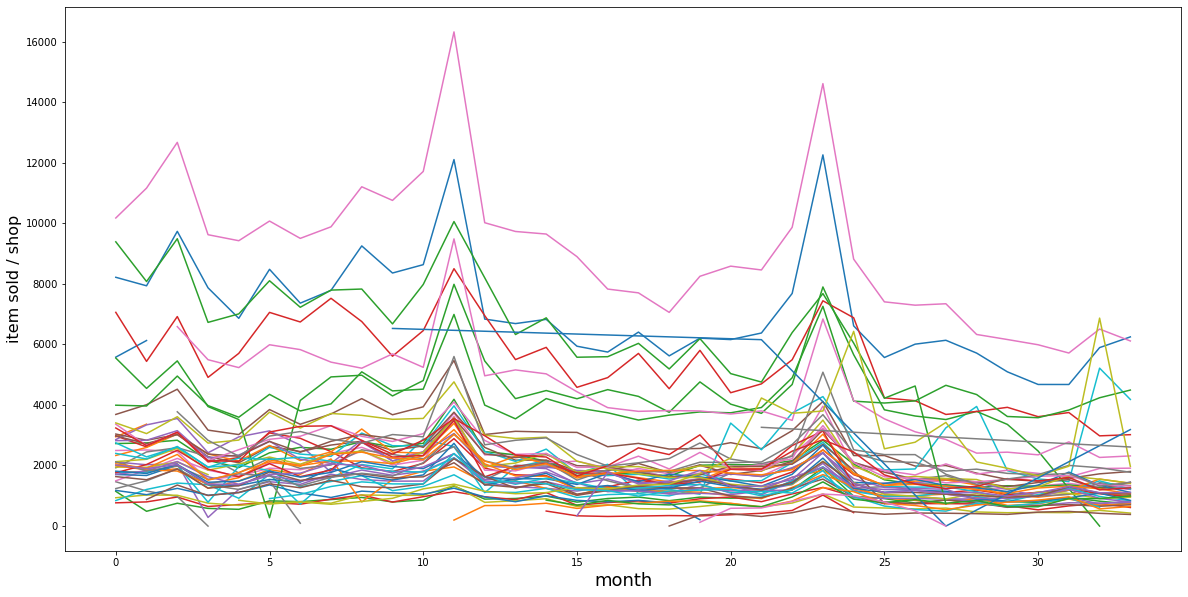

In [10]:
plt.figure(figsize=(20,10))
for shop_id in train_monthly_shop['shop_id'].unique():
    monthly_shop_i = train_monthly_shop.loc[train_monthly_shop['shop_id']==shop_id]
    plt.plot(monthly_shop_i['date_block_num'],monthly_shop_i['shop_cnt_month'])
plt.xlabel('month', fontsize=18)
plt.ylabel('item sold / shop', fontsize=16)
plt.show()

In [11]:
train_shop=train_monthly_shop.groupby(['shop_id']).agg({'shop_cnt_month':'sum'}).reset_index()
train_shop.rename(columns={'shop_cnt_month':'shop_cnt'},inplace=True)
print(train_shop.head(3))

   shop_id  shop_cnt
0        0   11705.0
1        1    6311.0
2        2   30620.0


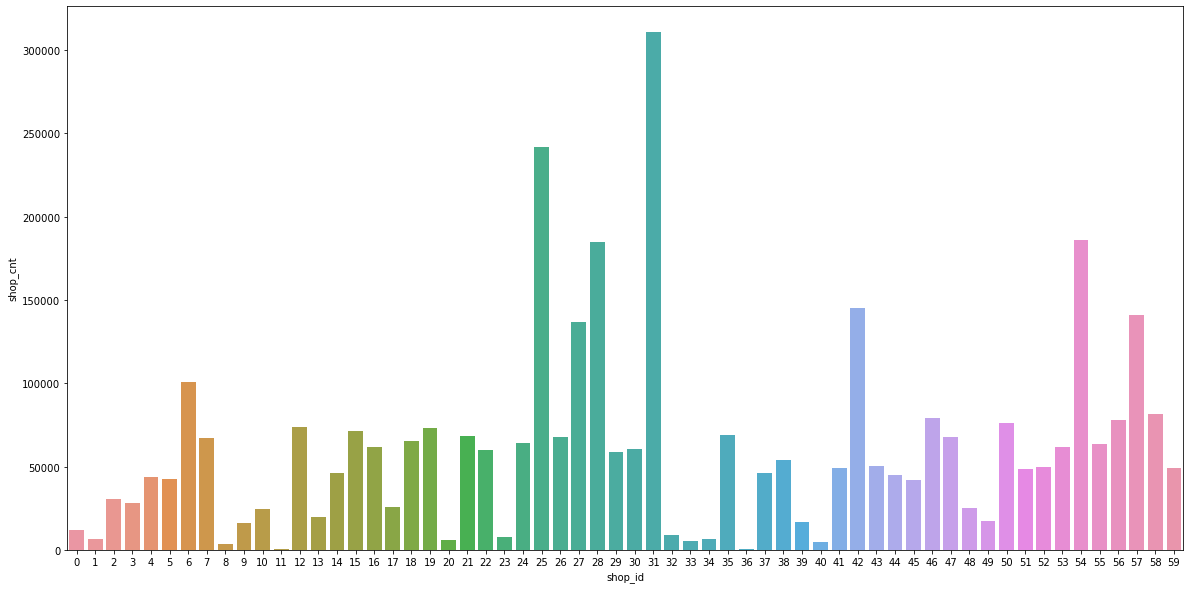

In [12]:
plt.figure(figsize=(20,10))
sns.barplot(x=train_shop['shop_id'],y=train_shop['shop_cnt'])
plt.show()

In [13]:
train_monthly = pd.merge(train_monthly, items, on='item_id', how='left')
train_monthly.drop(columns='item_name',inplace=True)
print(train_monthly.head(3))

   date_block_num  shop_id  item_id  item_cnt_month  item_category_id
0               0        0       32             6.0                40
1               0        0       33             3.0                37
2               0        0       35             1.0                40


In [14]:
train_monthly_category = train_monthly.groupby(['date_block_num','item_category_id']).agg({'item_cnt_month':'sum'}).reset_index()
train_monthly_category.rename(columns={'item_cnt_month':'category_cnt_month'},inplace=True)
print(train_monthly_category.head(3))

   date_block_num  item_category_id  category_cnt_month
0               0                 0                 1.0
1               0                 1                 1.0
2               0                 2              1390.0


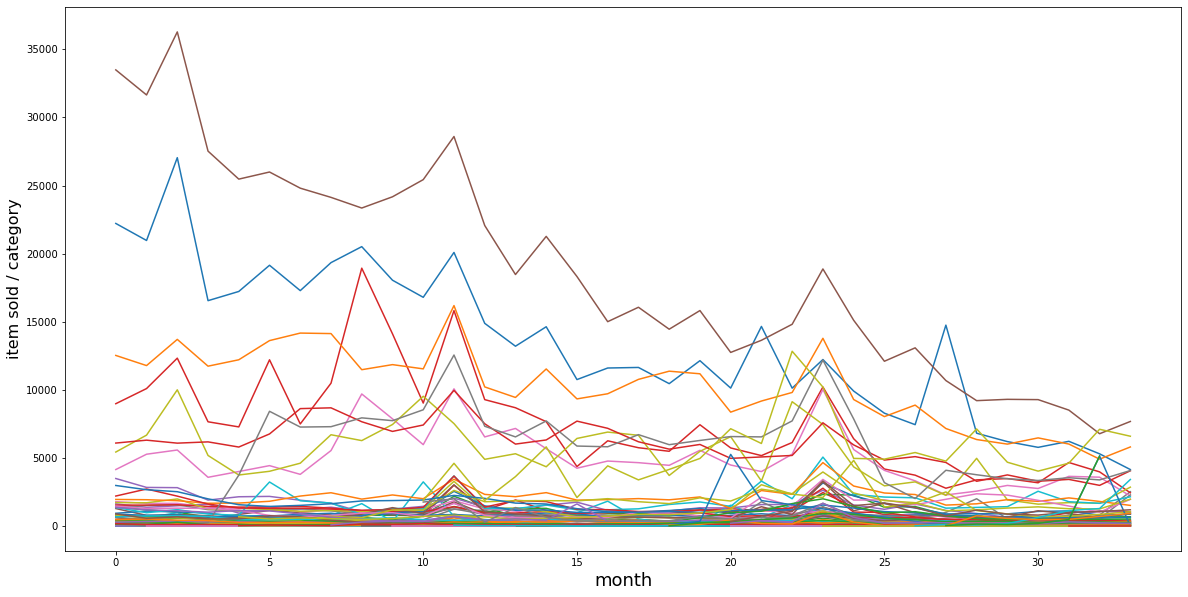

In [15]:
plt.figure(figsize=(20,10))
for item_category_id in train_monthly_category['item_category_id'].unique():
    monthly_category_i = train_monthly_category.loc[train_monthly_category['item_category_id']==item_category_id]
    plt.plot(monthly_category_i['date_block_num'],monthly_category_i['category_cnt_month'])
plt.xlabel('month', fontsize=18)
plt.ylabel('item sold / category', fontsize=16)
plt.show()

In [16]:
train_category=train_monthly_category.groupby(['item_category_id']).agg({'category_cnt_month':'sum'}).reset_index()
train_category.rename(columns={'category_cnt_month':'category_cnt'},inplace=True)
print(train_category.head(3))

   item_category_id  category_cnt
0                 0           3.0
1                 1           2.0
2                 2       19597.0


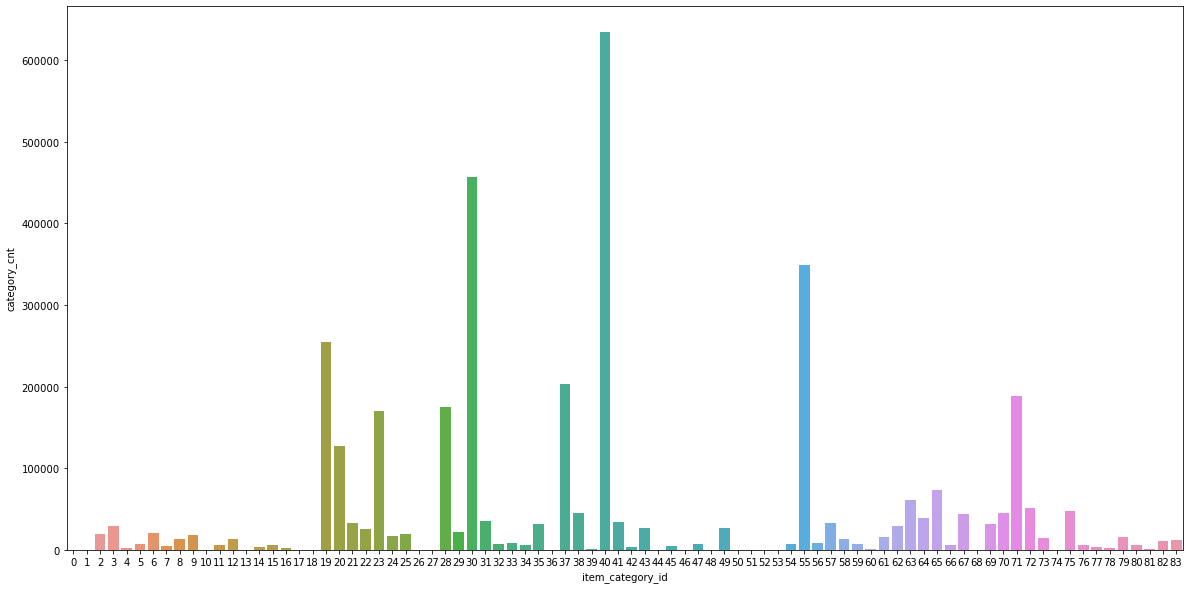

In [17]:
plt.figure(figsize=(20,10))
sns.barplot(x=train_category['item_category_id'],y=train_category['category_cnt'])
plt.show()